In [30]:
# read the data and name the columns

import pandas as pd

file_path = 'data/OPP-DART-2024-24502 (old 2023-21897) Litigation Cases.xlsx'
df = pd.read_excel(file_path, header=5)

In [32]:
# index
df = df.set_index("LIT Leave Decision Date - Year")
df = df.sort_index()

In [35]:
# drop additional columns
df = df.iloc[:-7]

In [36]:
df.tail(10)

,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
LIT Leave Decision Date - Year,,,,,,,,,
2023,Mexico,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,2.0
2023,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Lack Jurisdictio,Person Concerned,Federal Court,Port of Entry,Fort Erie District,1.0
2023,Libya,Discontinued - Withdrawn at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,Inland,Regional HQ Prairies NT,1.0
2023,India,Dismissed at Leave,Removal Order,Minister-Removal Order / Admin,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,2.0
2023,Namibia,Dismissed at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,India,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Case Processing Centre Edmonton,5.0
2023,Senegal,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Person Concerned,Federal Court,International Network,Unspecified,1.0
2023,Uganda,Discontinued - Consent at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Port of Entry,Montérégie Border District,1.0
2023,Nigeria,Discontinued - Consent at Leave,Removal Arrangements,A48-Removal Arrang.-Refusal,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,1.0


,Country of Citizenship,LIT Leave Decision Desc,LIT Case Type Group Desc,LIT Case Type Desc,LIT Filed By Desc,LIT Tribunal Type Desc,LIT Primary Office Type Desc,LIT Primary Office Regional Group Desc,LIT Litigation Count
LIT Leave Decision Date - Year,,,,,,,,,
2018,People's Republic of China,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Unspecified,1.0
2018,Poland,Allowed,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,GTA West IRCC,2.0
2018,Tunisia,Dismissed at Leave,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,1.0
2018,St. Vincent and the Grenadines,Dismissed at Leave,RPD Decisions,RPD-Not CR/Protected Person,Person Concerned,Federal Court,Inland,Unspecified,10.0
2018,Pakistan,Dismissed at Leave,RAD Decisions,RAD-Dismissed-Confirmed-Same,Person Concerned,Federal Court,Inland,Enforcement and Intelligence Operations Division,5.0
2018,India,Discontinued - Consent at Leave,Visa Officer Refusal,Visa Officer Decision,Third Party,Federal Court,International Network,Unspecified,7.0
2018,Colombia,Discontinued - Withdrawn at Leave,Removal Order,Minister-Other / Other Admin.,Person Concerned,Federal Court,Inland,Ontario West Area,1.0
2018,Colombia,Allowed,RPD Decisions,RPD-Not CR/Protected Person,Person Concerned,Federal Court,Port of Entry,Montérégie Border District,2.0
2018,Jamaica,Allowed,HC Decisions,HC Refusal-Perm Res,Person Concerned,Federal Court,Inland,Humanitarian Migration and Integrity Division,3.0


EDA

In [39]:
# try to understand what types of decisions are made
df['LIT Leave Decision Desc'].value_counts(dropna=False)

LIT Leave Decision Desc
Dismissed at Leave                   6011
Allowed                              3148
Discontinued - Withdrawn at Leave    2861
Discontinued - Consent at Leave      1454
Allowed - Consent                     260
Not Started at Leave                   37
No Leave Required                       8
Leave Exception                         2
Name: count, dtype: int64

In [41]:
# top 10 countries with the most cases
df['Country of Citizenship'].value_counts().head(10)

Country of Citizenship
India                         947
Nigeria                       838
People's Republic of China    662
Pakistan                      497
Mexico                        420
Colombia                      379
Iran                          361
United States of America      353
Haiti                         312
Philippines                   309
Name: count, dtype: int64

In [42]:
# focus on the top 10 countries that have the most cases
top_countries = [
    'India', 'Nigeria', "People's Republic of China", 'Pakistan', 'Mexico',
    'Colombia', 'Iran', 'United States of America', 'Haiti', 'Philippines'
]

top_10 = df[df['Country of Citizenship'].isin(top_countries)]

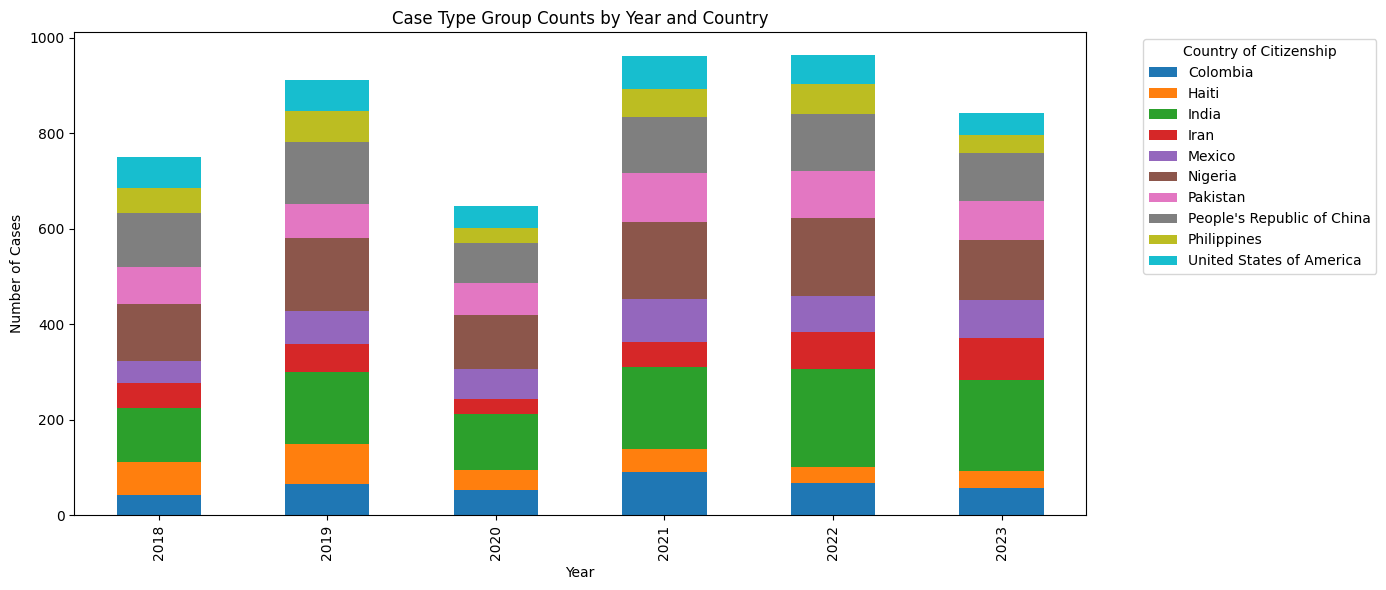

In [61]:
import matplotlib.pyplot as plt

# group with Country unstacked
grouped = top_10.groupby(['Country of Citizenship', 'LIT Leave Decision Date - Year'])['LIT Case Type Group Desc'].count().unstack(fill_value=0)

# plot (years on x-axis, countries as stacks)
grouped.T.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Case Type Group Counts by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Country of Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

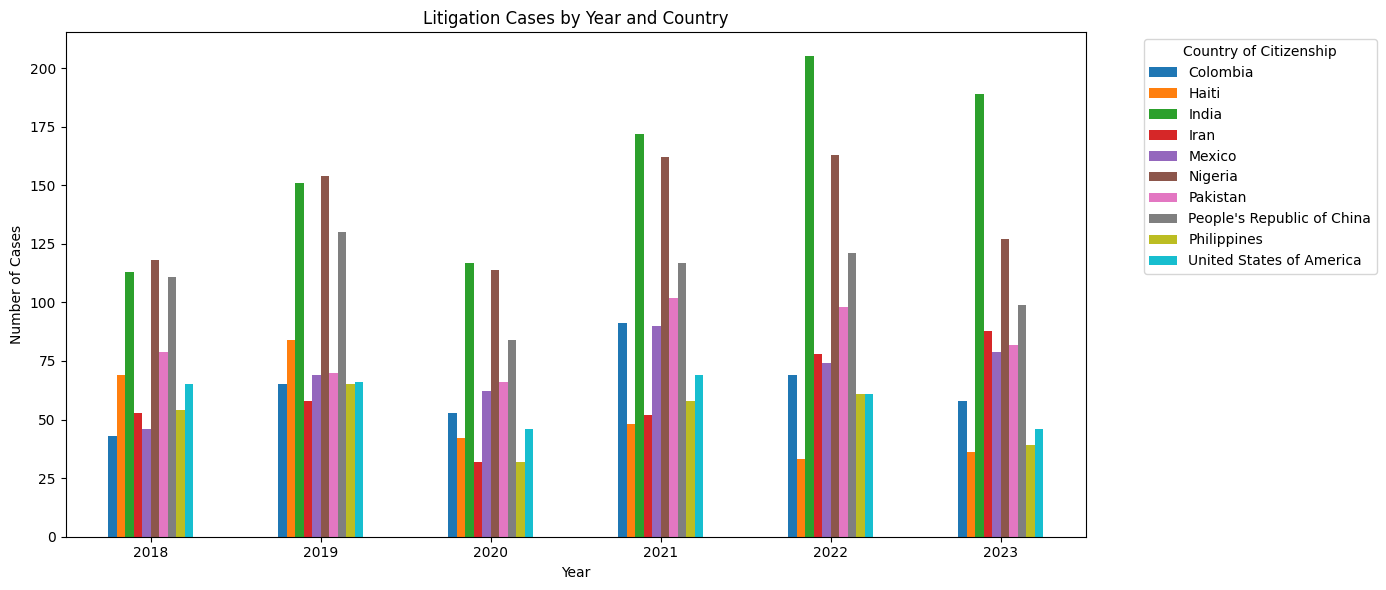

In [62]:
import matplotlib.pyplot as plt

# group by Year and Country
grouped = top_10.groupby(['LIT Leave Decision Date - Year', 'Country of Citizenship'])['LIT Case Type Group Desc'].count().unstack(fill_value=0)

# plot grouped bar chart (not stacked)
grouped.plot(kind='bar', figsize=(14,6))
plt.title('Litigation Cases by Year and Country')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='Country of Citizenship', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

To have a closer look into COVID 

In [63]:
top_10 = top_10.copy()
top_10['Period'] = top_10.index.to_series().astype(int).apply(classify_period)

In [70]:
def classify_period(year):
    if year in [2018, 2019]:
        return 'Pre-COVID'
    elif year in [2020, 2021, 2022]:
        return 'COVID'
    elif year == 2023:
        return 'Post-COVID'
    else:
        return 'Other'

top_10['Period'] = top_10.index.to_series().astype(int).apply(classify_period)

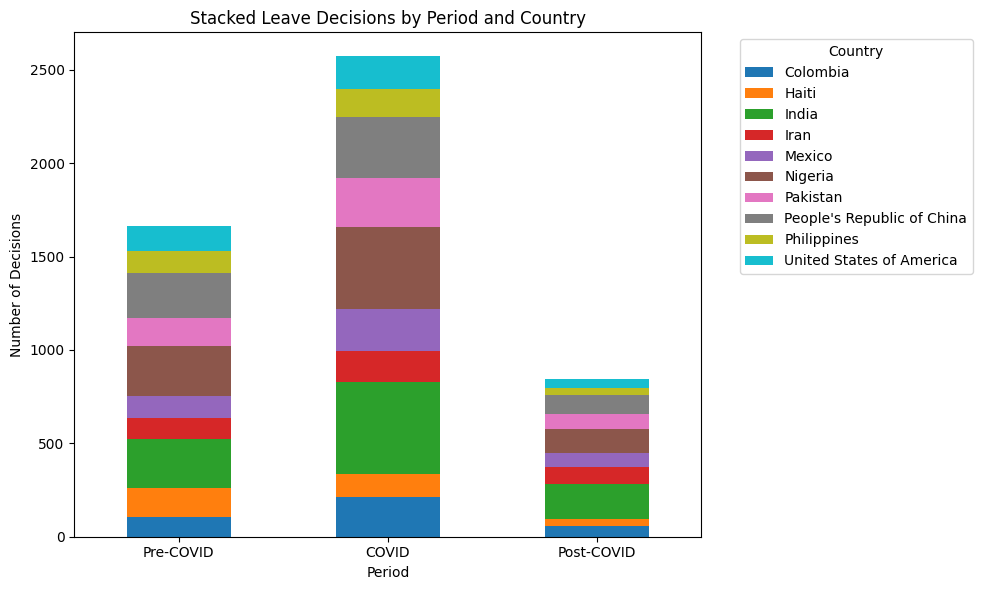

In [75]:
# reorder rows (Period) before plotting
grouped = grouped.reindex(['Pre-COVID', 'COVID', 'Post-COVID'])

# plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Leave Decisions by Period and Country')
plt.xlabel('Period')
plt.ylabel('Number of Decisions')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

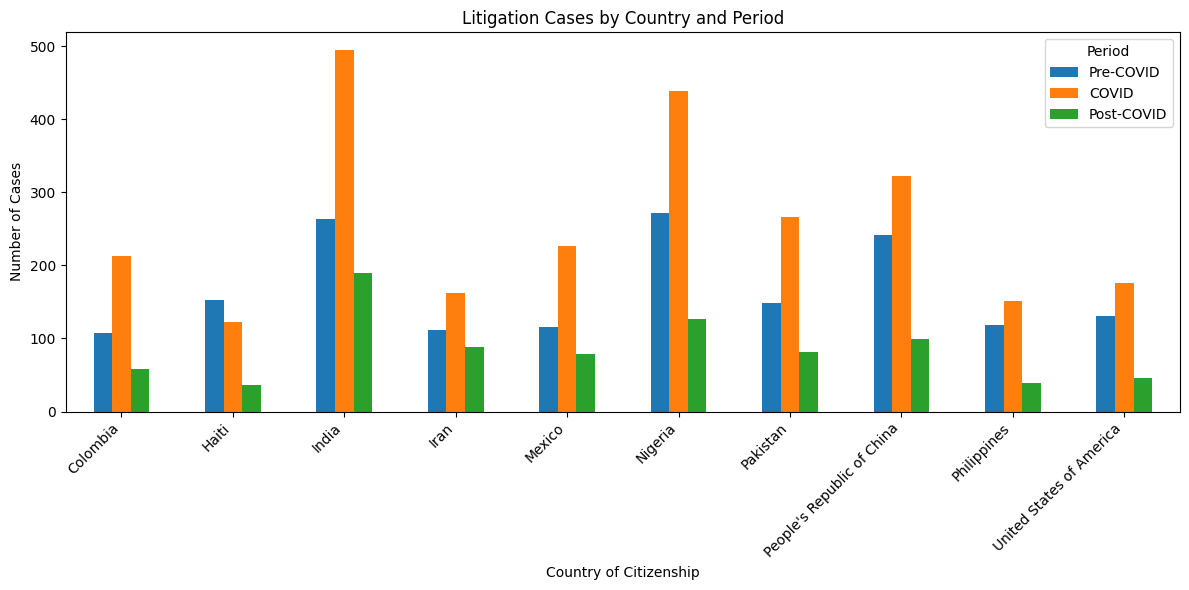

In [79]:
import matplotlib.pyplot as plt

# group and count, unstack Periods
grouped = (
    top_10.groupby(['Country of Citizenship', 'Period'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=['Pre-COVID', 'COVID', 'Post-COVID'])  # enforce desired order
)

# plot
grouped.plot(kind='bar', figsize=(12,6))
plt.title('Litigation Cases by Country and Period')
plt.xlabel('Country of Citizenship')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Period')
plt.tight_layout()
plt.show()